# Домашнее задание по теме «Временные ряды, общая теория»

### Задание
_Скачайте материалы к занятию.
Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными:_
- monthly-sales-of-company-x-jan-6.csv
- monthly-boston-armed-robberies-j.csv
- international-airline-passengers.csv
- mean-monthly-air-temperature-deg.csv
- weekly-closings-of-the-dowjones-.csv
- daily-total-female-births-in-cal.csv

_Пришлите решение в виде ссылки на GitHub с ноутбуком._

**Загрузим все необходимы для работы библиотеки**


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

**Определим параметры графиков**

In [10]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

- sns.set(style="whitegrid") - "whitegrid" — это стиль с белым фоном и тонкой сеткой, что удобно для анализа числовых рядов.
- plt.rcParams["figure.figsize"] = (14, 6) - устанавливает размер всех графиков по умолчанию

**Сделаем функцию для проверки стационарности**

In [11]:
# Функция для проверки стационарности
def check_stationarity(timeseries, name=""):
    result = adfuller(timeseries.dropna())
    print(f"\n--- ADF Test for {name} ---")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    for key, value in result[4].items():
        print(f"  Critical Value ({key}): {value}")
    if result[1] <= 0.05:
        print("стационарен")
        return True
    else:
        print("нестационарен")
        return False

_def check_stationarity(timeseries, name=""):_

- Объявляется функция check_stationarity
- timeseries: временной ряд (обычно Series из Pandas)
- name="": необязательный параметр — просто подпись для вывода в консоль

_result = adfuller(timeseries.dropna())_

- Запускаем ADF-тест с помощью adfuller() из statsmodels
- .dropna() убирает пропущенные значения (иначе тест выдаст ошибку)
- result — это кортеж с результатами теста:
- result[0]: ADF статистика
- result[1]: p-value
- result[4]: словарь с критическими значениями (1%, 5%, 10%)

_for key, value in result[4].items():
        print(f"  Critical Value ({key}): {value}")_
- Показываем критические значения для разных уровней значимости (1%, 5%, 10%)
- Сравниваются с ADF-статистикой, чтобы судить о стационарности

**Подготавливаем функцию обработки файлика**

In [14]:
def process_series_auto(filepath, freq_hint="infer"):
    df = pd.read_csv(filepath)
    if df.shape[1] != 2:
        print(f"Ожидалось 2 колонки, а не {df.shape[1]} — пропускаем {filepath}")
        return
    
    date_col, val_col = df.columns[0], df.columns[1]

    # Специальная обработка для недельного формата
    if 'dowjones' in filepath.lower():
        try:
            df[date_col] = pd.to_datetime(df[date_col] + '-1', format='%G-W%V-%u')
        except Exception as e:
            print(f"Ошибка преобразования даты в {filepath}: {e}")
            return
    else:
        df[date_col] = pd.to_datetime(df[date_col])

    df.set_index(date_col, inplace=True)
    df = df.sort_index()

    if freq_hint != "infer":
        df = df.asfreq(freq_hint)

    name = os.path.basename(filepath)
    print(f"\n📈 Анализ: {name}")

    df[val_col].plot(title=f"{name} — исходный ряд")
    plt.show()

    is_stat = check_stationarity(df[val_col], name)

    if is_stat:
        return

    ts_log = np.log(df[val_col].replace(0, np.nan))
    ts_diff = ts_log.diff()

    ts_diff.plot(title=f"{name} — логарифм + дифференцирование")
    plt.show()

    check_stationarity(ts_diff, name + " (лог+diff)")

**Функция process_series_auto() автоматически обрабатывает один CSV-файл с временным рядом:**
- преобразует даты,
- строит график,
- проверяет стационарность,
- при необходимости делает логарифмирование и дифференцирование,
- повторно проверяет стационарность.



📈 Анализ: daily-total-female-births-in-cal.csv


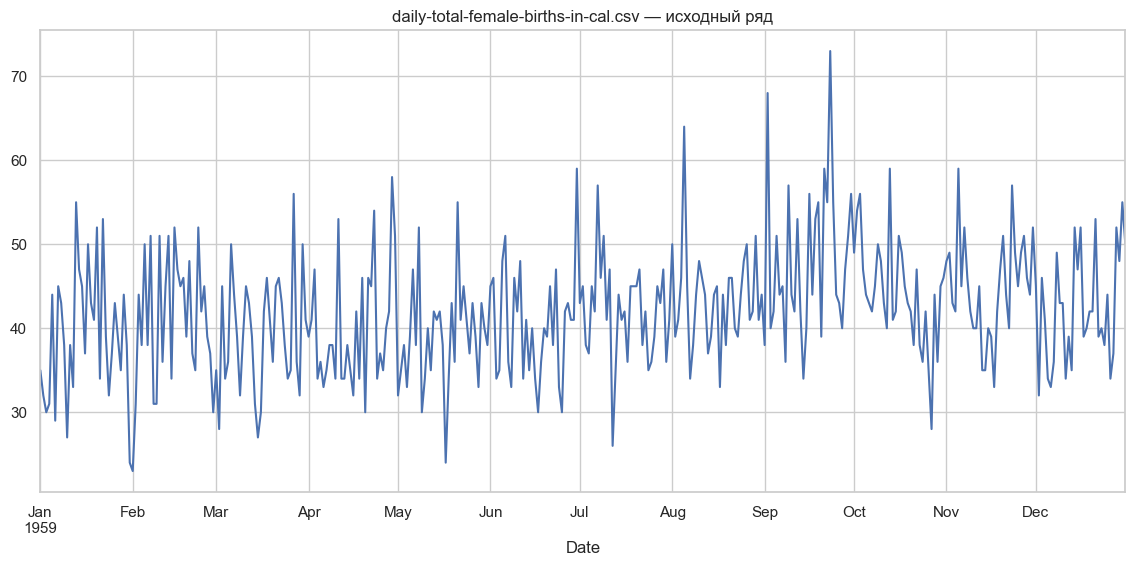


--- ADF Test for daily-total-female-births-in-cal.csv ---
ADF Statistic: -4.808291253559767
p-value: 5.243412990149787e-05
  Critical Value (1%): -3.448748905151901
  Critical Value (5%): -2.8696473721448728
  Critical Value (10%): -2.5710891239349585
стационарен

📈 Анализ: mean-monthly-air-temperature-deg.csv


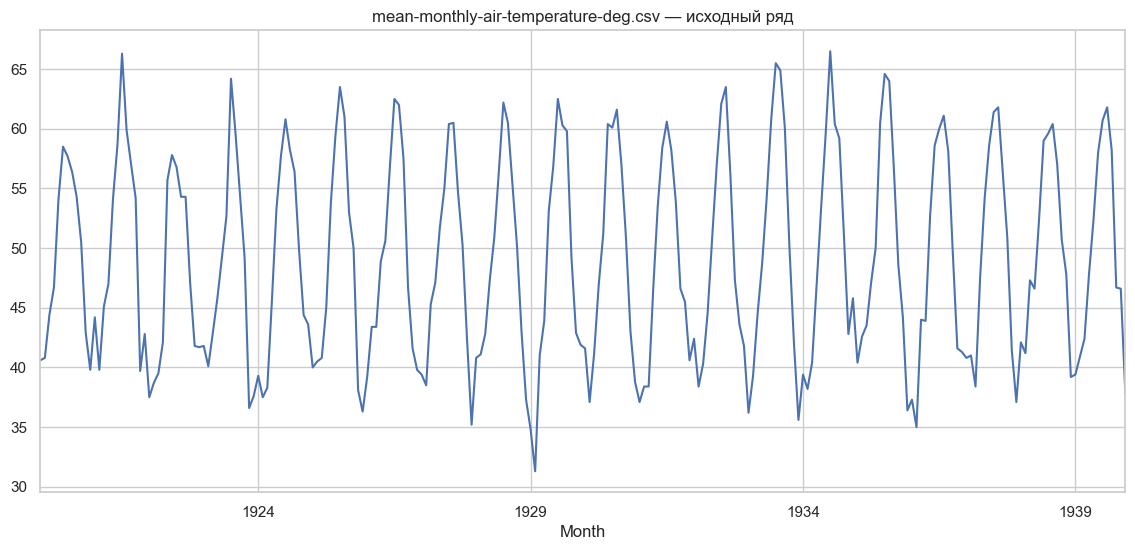


--- ADF Test for mean-monthly-air-temperature-deg.csv ---
ADF Statistic: -3.2554924030863472
p-value: 0.01698903022260808
  Critical Value (1%): -3.4597521044060353
  Critical Value (5%): -2.874472927517147
  Critical Value (10%): -2.5736628197530864
стационарен

📈 Анализ: monthly-boston-armed-robberies-j.csv


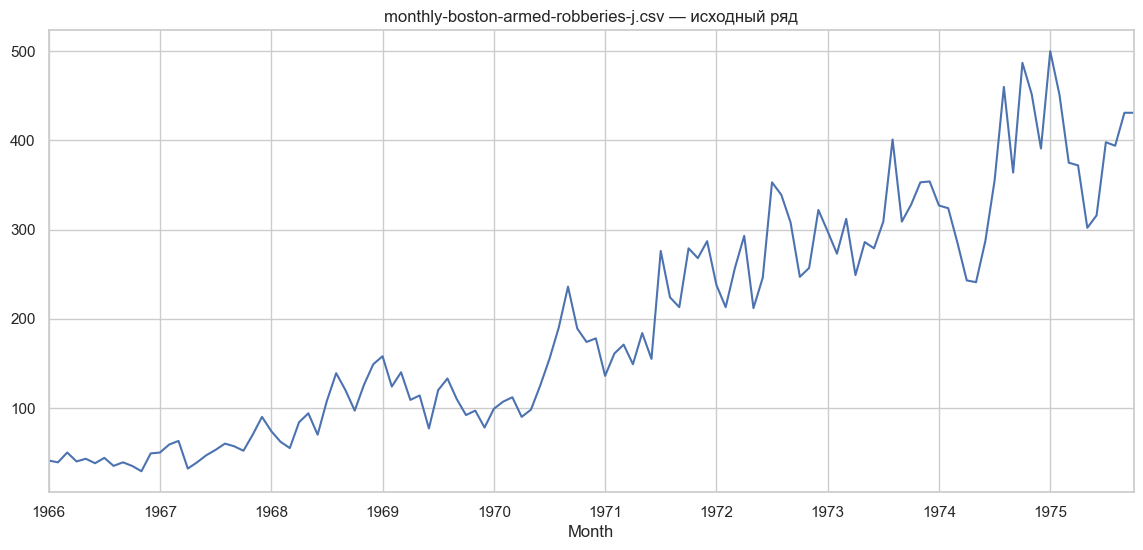


--- ADF Test for monthly-boston-armed-robberies-j.csv ---
ADF Statistic: 1.0011021402457965
p-value: 0.9942775638057232
  Critical Value (1%): -3.4936021509366793
  Critical Value (5%): -2.8892174239808703
  Critical Value (10%): -2.58153320754717
нестационарен


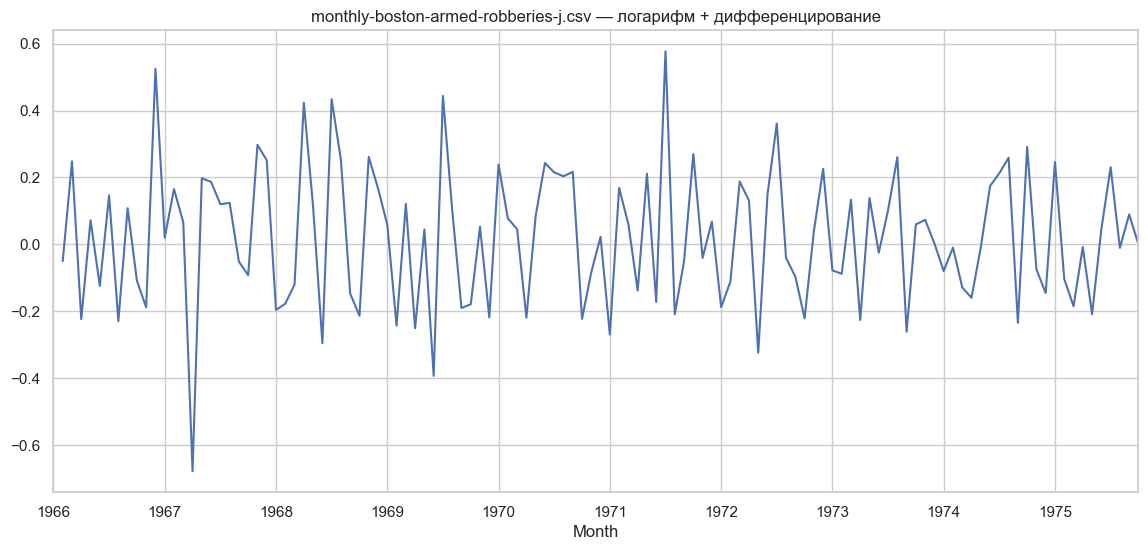


--- ADF Test for monthly-boston-armed-robberies-j.csv (лог+diff) ---
ADF Statistic: -7.601792127269043
p-value: 2.3786024417437257e-11
  Critical Value (1%): -3.489589552580676
  Critical Value (5%): -2.887477210140433
  Critical Value (10%): -2.580604145195395
стационарен

📈 Анализ: international-airline-passengers.csv


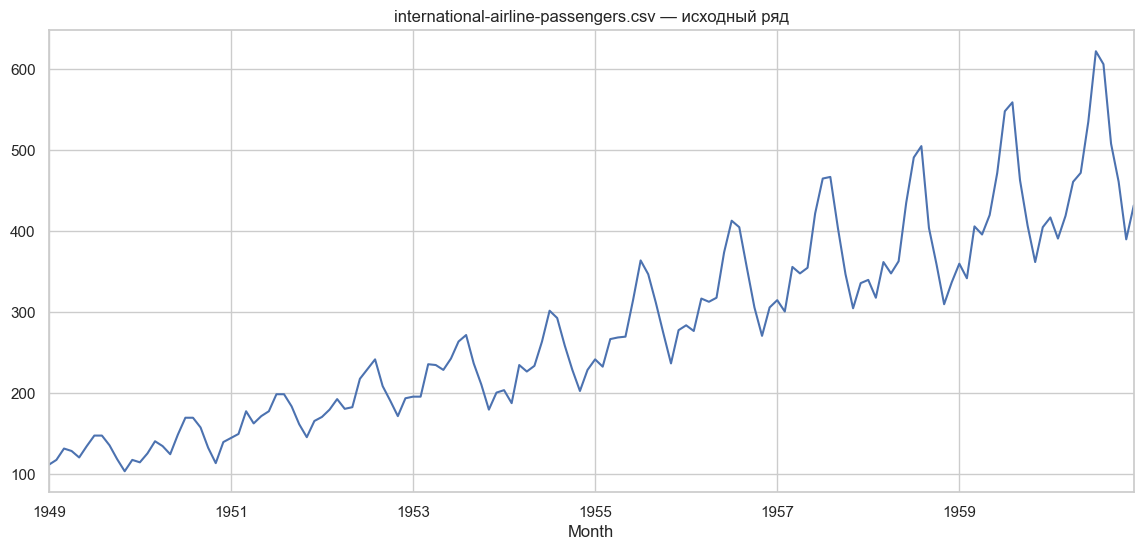


--- ADF Test for international-airline-passengers.csv ---
ADF Statistic: 0.8153688792060421
p-value: 0.9918802434376409
  Critical Value (1%): -3.4816817173418295
  Critical Value (5%): -2.8840418343195267
  Critical Value (10%): -2.578770059171598
нестационарен


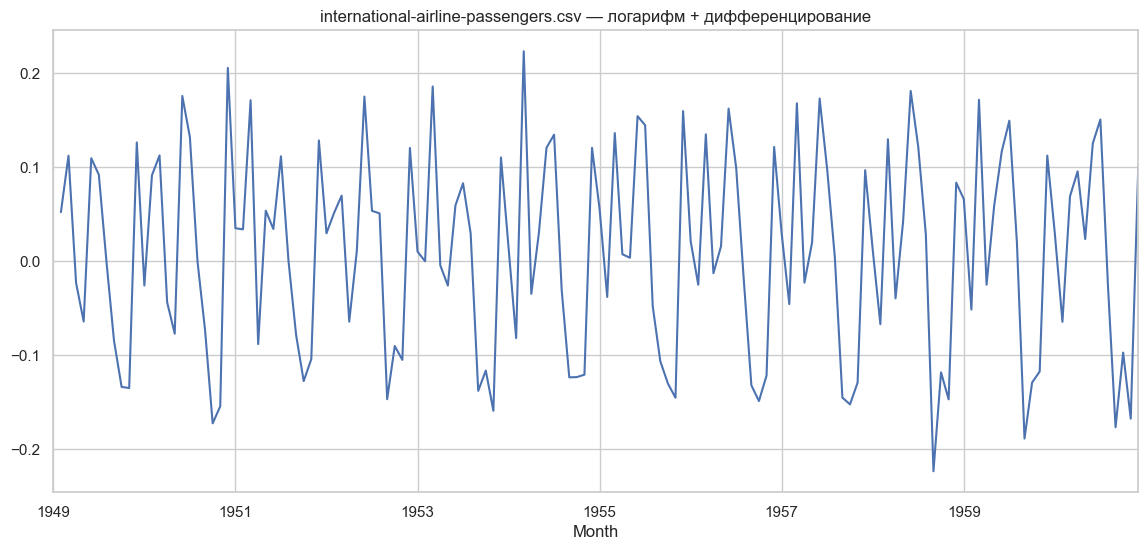


--- ADF Test for international-airline-passengers.csv (лог+diff) ---
ADF Statistic: -2.7171305983881355
p-value: 0.07112054815085829
  Critical Value (1%): -3.4825006939887997
  Critical Value (5%): -2.884397984161377
  Critical Value (10%): -2.578960197753906
нестационарен

📈 Анализ: monthly-sales-of-company-x-jan-6.csv


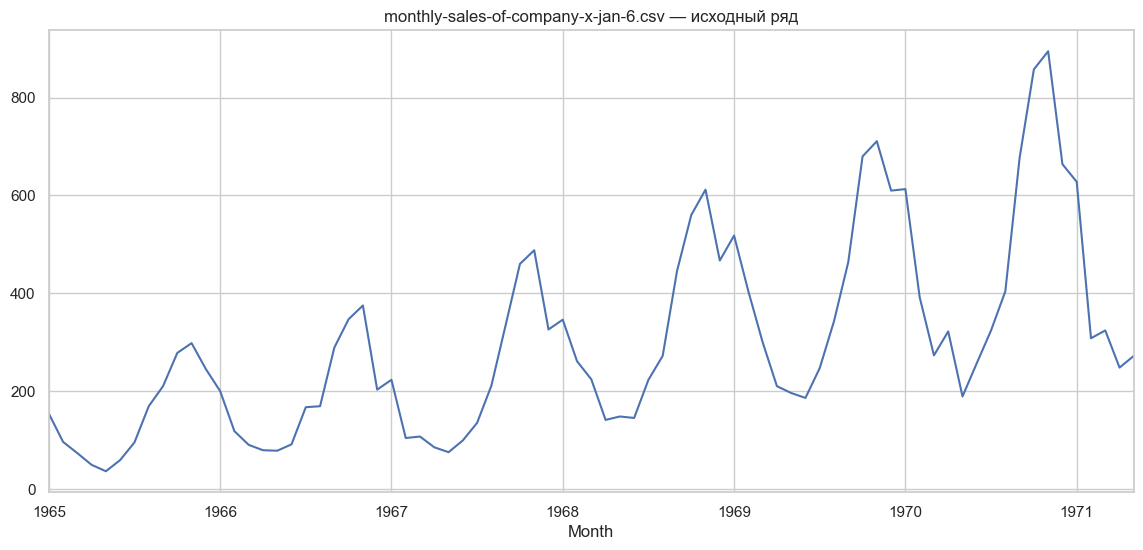


--- ADF Test for monthly-sales-of-company-x-jan-6.csv ---
ADF Statistic: 0.6547150829524464
p-value: 0.9888894205170052
  Critical Value (1%): -3.53692771987915
  Critical Value (5%): -2.907887369384766
  Critical Value (10%): -2.591493291015625
нестационарен


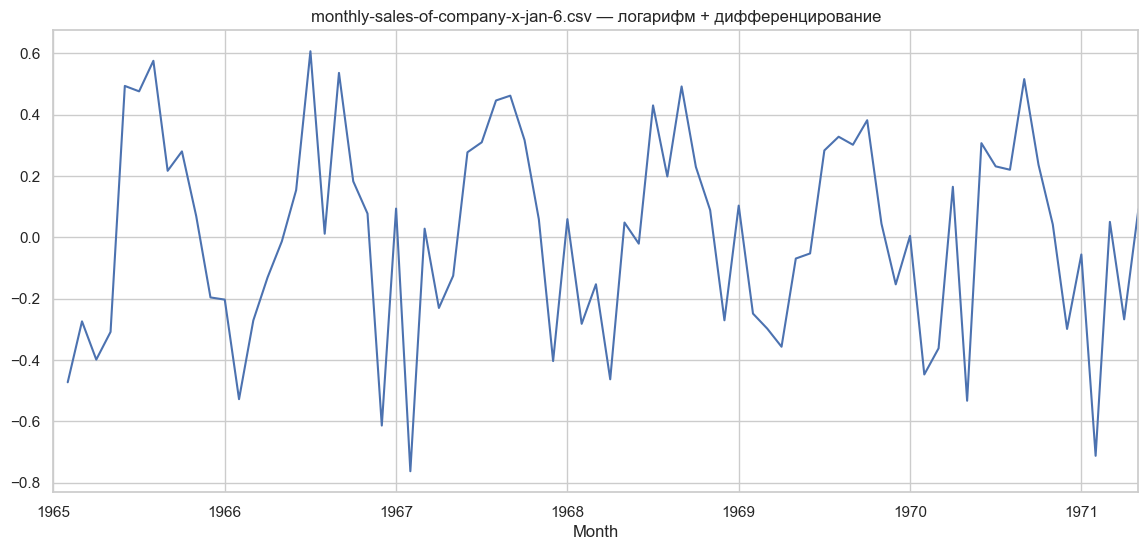


--- ADF Test for monthly-sales-of-company-x-jan-6.csv (лог+diff) ---
ADF Statistic: -3.1356438010066396
p-value: 0.024025392839874878
  Critical Value (1%): -3.53692771987915
  Critical Value (5%): -2.907887369384766
  Critical Value (10%): -2.591493291015625
стационарен

📈 Анализ: weekly-closings-of-the-dowjones-.csv


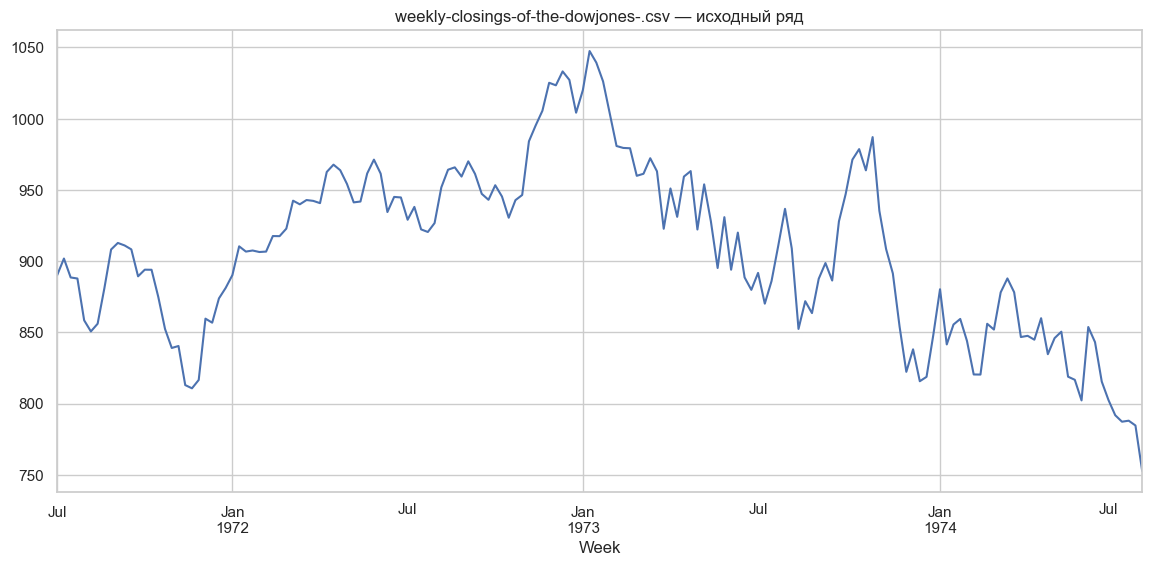


--- ADF Test for weekly-closings-of-the-dowjones-.csv ---
ADF Statistic: -1.3146254984911765
p-value: 0.6224548515589696
  Critical Value (1%): -3.471633386932248
  Critical Value (5%): -2.8796651107461972
  Critical Value (10%): -2.576433647235832
нестационарен


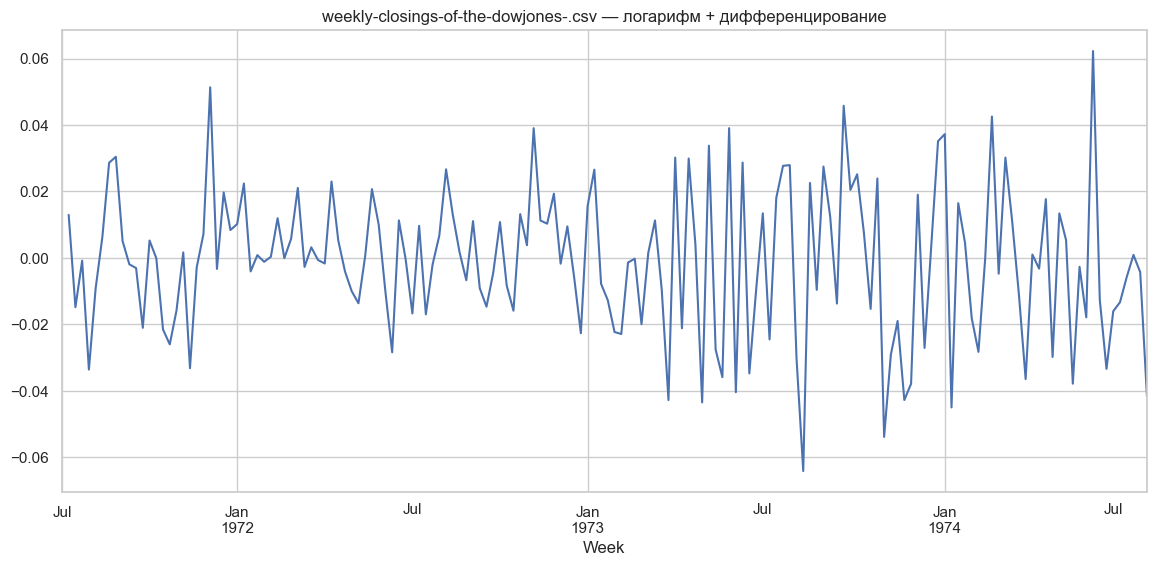


--- ADF Test for weekly-closings-of-the-dowjones-.csv (лог+diff) ---
ADF Statistic: -12.995820716080102
p-value: 2.7516091322913448e-24
  Critical Value (1%): -3.4718957209472654
  Critical Value (5%): -2.8797795410156253
  Critical Value (10%): -2.5764947265625
стационарен


In [15]:
# Обработка всех файлов в папке
folder = "Series"
for file in os.listdir(folder):
    if file.endswith(".csv"):
        filepath = os.path.join(folder, file)
        try:
            process_series_auto(filepath)
        except Exception as e:
            print(f"Ошибка в {file}: {e}")